In [1]:
from splat.read_colmap import read_images_text, qvec2rotmat
from splat.gaussians import Gaussians
from splat.gaussian_scene import GaussianScene
import pycolmap
import torch 
import torch.nn as nn
import numpy as np

from splat.utils import read_images_text, read_images_binary
import open3d as o3d

# Replace 'your_file.ply' with the path to your .ply file
ply_file_path = 'luma.ply'
point_cloud = o3d.io.read_point_cloud(ply_file_path)
colmap_path = "360_extra_scenes/treehill/sparse/0"

reconstruction = pycolmap.Reconstruction(colmap_path)
test = False

points3d = reconstruction.points3D
images = read_images_binary(f"{colmap_path}/images.bin")
cameras = reconstruction.cameras

image_num = 100
image = images[image_num]

gaussians = Gaussians(
    torch.Tensor(point_cloud.points), 
    torch.Tensor(point_cloud.colors),
    model_path="./point_clouds"
)

/var/folders/hm/ll4g2nzj0jnckzf_w02pc2lm0000gn/T/ipykernel_55457/782609343.py:28: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  torch.Tensor(point_cloud.points),


initialized_points


In [11]:
(colors * 256).max()

tensor(1.)

In [2]:
import matplotlib.pyplot as plt

scene = GaussianScene(
    colmap_path=colmap_path,
    gaussians=gaussians,
)

torch.Size([1436466, 2])


(0.0, 3744.0)

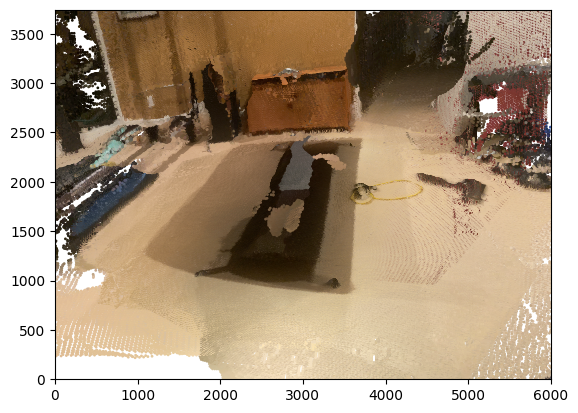

In [13]:
import matplotlib.pyplot as plt
import torch

with torch.no_grad():
    processed = scene.preprocess(image_num)
points = processed.points
colors = processed.colors

points_truth = (points[:, 0] < 6000) & (points[:, 0] > 0) & (points[:, 1] < 3744) & (points[:, 1] > 0)
points = points[points_truth]
colors = colors[points_truth]
print(points.shape)
plt.scatter(points[:, 0], points[:, 1], c=colors * 256, s=1)
plt.xlim(0, 6000)
plt.ylim(0, 3744)
# plt.gca().invert_yaxis() 

In [6]:
colors

tensor([[1.3634e-03, 1.2255e-03, 1.2255e-03],
        [2.3744e-03, 1.9914e-03, 1.5778e-03],
        [1.4553e-03, 1.5319e-03, 1.9455e-03],
        ...,
        [5.9743e-04, 3.9828e-04, 6.1275e-05],
        [1.0417e-03, 9.4975e-04, 7.9657e-04],
        [9.9571e-04, 7.6593e-04, 4.2892e-04]])